Autor: Martín de las Heras

# Práctica 5

Pasos a realizar en la práctica:
1. Un modelo de clasificación con un árbol de decisión para el dataset de los pingüinos, separándolo en 70/30.
2. Sacar la matriz de confusión del mismo.
3. Hacer *pruning* sobre el primer árbol.

*Features* a considerar:
- *Flipper length*
- *Bill depth*

No consideramos *weight*.

Partiendo del [código de la Universidad de Edimburgo](https://eldave93.github.io/Machine-Learning-in-Python-20-21/Week_09_Trees/1_Decision_Trees.html).

En primer lugar, importamos todas las librerías que vamos a necesitar a lo largo de la práctica

In [1]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

A continuación, cargamos el dataset de pingüinos, eliminando los valores *NaN*.

In [2]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Para ver las relaciones entre los diferentes atributos de los pingüinos, hacemos el llamado *pairplot*.

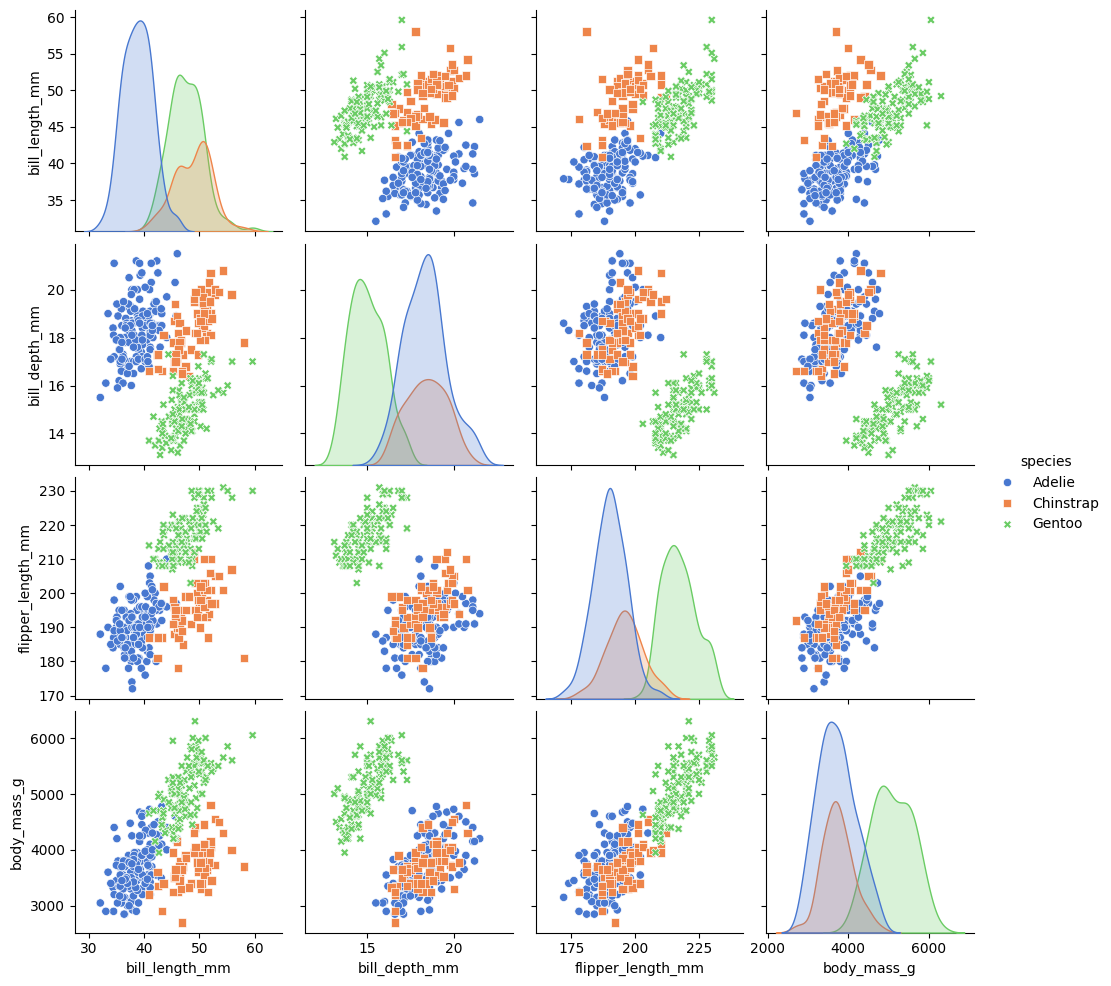

In [3]:
sns.pairplot(penguins, hue='species', palette='muted', markers=['o','s','X']);

Separamos el conjunto de datos en entrenamiento (70%) y test (30%). Atribuyendo al entrenamiento los atributos de *bill depth* y *flipper length*.

De la misma manera, definimos un árbol de clasificación, el cual alimentamos con los datos de entrenamiento definidos justo antes. También realizamos una predicción con los datos del test, de manera que obtengamos unos resultados para la matriz de confusión.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(penguins[['bill_depth_mm', 'flipper_length_mm']], penguins['species'], test_size=0.3, random_state=123)

decision_tree = DecisionTreeClassifier(criterion='gini', random_state=123)
predictor = decision_tree.fit(X_train, y_train)
y_pred = predictor.predict(X_test)


Usando la predicción hecha, trazamos la matriz de confusión.

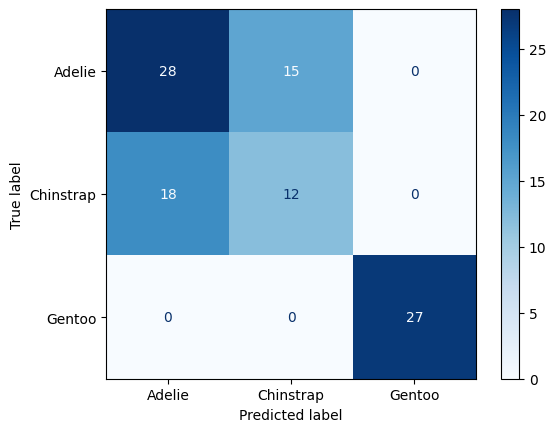

In [5]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,labels=['Adelie','Chinstrap','Gentoo']), display_labels=['Adelie','Chinstrap','Gentoo']).plot(cmap='Blues');

Podemos ver que le cuesta distinguir entre Adelie y Chinstrap, pero si nos vamos al *pairplot* de antes, podemos ver que se trata de dos especies muy solapadas en cuanto a los dos atributos que hemos definido se refiere, por lo que se trata de una confusión razonable.

De cara al *pruning*, el parámetro a tener en cuenta es el llamado *cpp_alpha*, el cual determina cuánto se va a podar el árbol. Sacamos entonces los valores que puede tomar, de manera que el último valor de la lista, implicaría un árbol que ha sido podado completamente, de manera que siempre predice el mismo valor.

Ponremos como ejemplo el sexto valor de la lista, y trazaremos la matriz de confusión de las predicciones del árbol resultante.

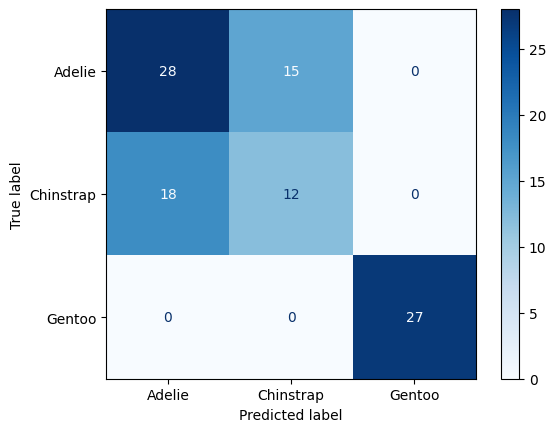

In [6]:
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
decision_tree_pruned = DecisionTreeClassifier(criterion='gini', random_state=123, ccp_alpha=path.ccp_alphas[5])
predictor = decision_tree_pruned.fit(X_train, y_train)
y_pred = predictor.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,labels=['Adelie','Chinstrap','Gentoo']), display_labels=['Adelie','Chinstrap','Gentoo']).plot(cmap='Blues');